In [1]:
!pip install yfinance
!pip install pmdarima

     |████████████████████████████████| 6.4 MB 9.6 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
     |████████████████████████████████| 1.4 MB 10.5 MB/s 
     |████████████████████████████████| 9.8 MB 33.7 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninsta

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import yfinance as yf
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

Downloading the data using yfinance API

In [3]:
tickers = ["BTC-USD","ETH-USD","ETC-USD"]
start = datetime.datetime(2020,1,1)
end = datetime.datetime(2022,1,1)
data = yf.download(tickers,start=start,end = end, interval='1d')['Close']
#data.dropna(inplace=True)
data.head()

[*********************100%***********************]  3 of 3 completed


,BTC-USD,ETC-USD,ETH-USD
Date,,,
2020-01-01,7200.174316,4.502792,130.802002
2020-01-02,6985.470215,4.255888,127.410179
2020-01-03,7344.884277,4.576237,134.171707
2020-01-04,7410.656738,4.726842,135.069366
2020-01-05,7411.317383,4.907899,136.276779


In [4]:
data = data.rename({'BTC-USD':'BTC'}, axis='columns')
data = data.rename({'ETC-USD':'ETC'}, axis='columns')
data = data.rename({'ETH-USD':'ETH'}, axis='columns')

In [5]:
len(data)

732

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BTC,732.0,29276.996423,19677.885222,4970.788086,9720.034912,29187.936523,47729.456055,67566.828125
ETC,732.0,24.321442,24.554890,3.963946,6.160748,8.571023,47.734965,134.101791
ETH,732.0,1544.302857,1437.031209,110.605873,244.990406,744.711182,2636.036499,4812.087402


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 732 entries, 2020-01-01 to 2022-01-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BTC     732 non-null    float64
 1   ETC     732 non-null    float64
 2   ETH     732 non-null    float64
dtypes: float64(3)
memory usage: 22.9 KB


There are no NULL values in the data.

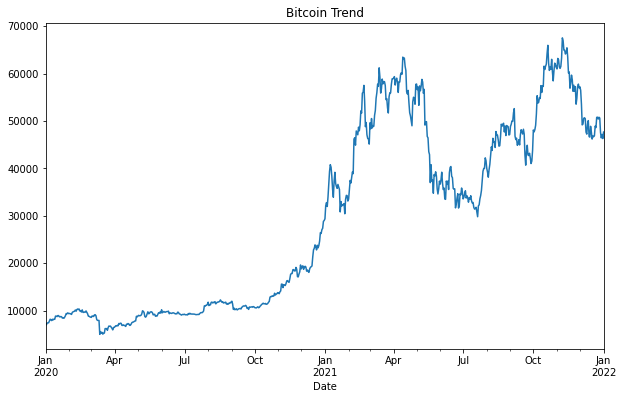

In [8]:
plt.figure(figsize=(10, 6))
data['BTC'].plot()
plt.title("Bitcoin Trend")
plt.show()

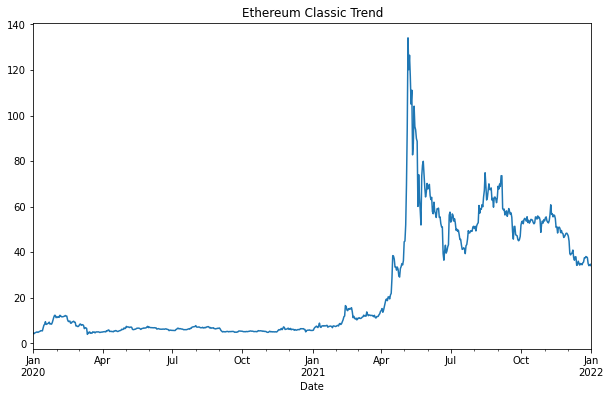

In [9]:
plt.figure(figsize=(10, 6))
data['ETC'].plot()
plt.title("Ethereum Classic Trend")
plt.show()

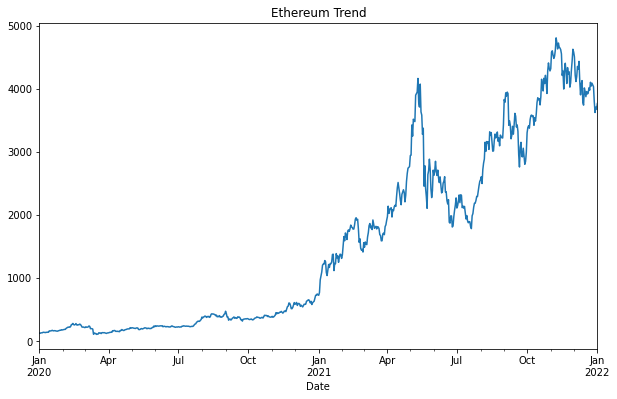

In [10]:
plt.figure(figsize=(10, 6))
data['ETH'].plot()
plt.title("Ethereum Trend")
plt.show()

The trends of Bitcoin and Ethereum are are very similar. Ethereum classic also has similar trend pattern, except for the last one year.
Data doesn't look startionary for any of the three crypto's.

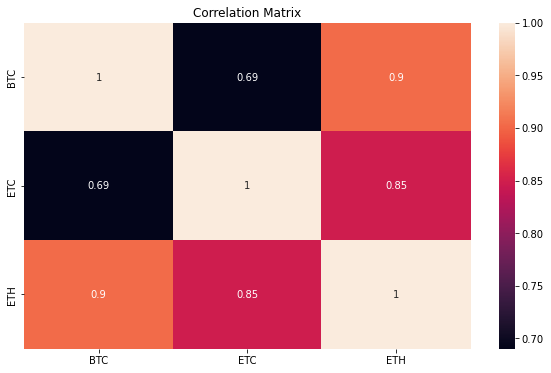

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

There is very high positive correlation between crypto currencies. As expected based on the trend patterns, Bitcoin and Ethereum are very highly correlated.

In [12]:
returns = data.pct_change()
returns.dropna(inplace=True)
returns.head()

,BTC,ETC,ETH
Date,,,
2020-01-02,-0.029819,-0.054834,-0.025931
2020-01-03,0.051452,0.075272,0.053069
2020-01-04,0.008955,0.032910,0.006690
2020-01-05,0.000089,0.038304,0.008939
2020-01-06,0.048291,0.028163,0.058905


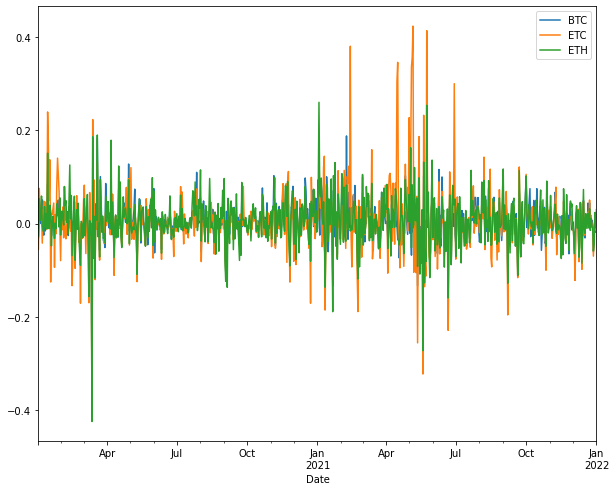

In [13]:
returns.plot(figsize=(10,8))

The returns for all crypto's followed same pattern and almost overlapped. Meaning the expected returns are very similar.

How correlated are Bitcoin and Ethereum?

In [14]:
import statsmodels.api as sm
y = returns['BTC']
X = returns['ETH']
X = sm.add_constant(X, prepend=False)
est_btc = sm.OLS(y, X)
model_btc = est_btc.fit()
model_btc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BTC   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     1253.
Date:                Sat, 26 Mar 2022   Prob (F-statistic):          1.61e-160
Time:                        22:23:52   Log-Likelihood:                 1682.6
No. Observations:                 731   AIC:                            -3361.
Df Residuals:                     729   BIC:                            -3352.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ETH            0.6022      0.017     35.403      0.000       0.569       0.636
const         -0.0002      0.001     -0.251      0.802      -0.002       0.002
==============================================================================
Omnibus:                       79.649   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              587.684
Skew:                           0.046   Prob(JB):                    2.43e-128
Kurtosis:                       7.392   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model results indicate that p-value is 0, which means the coefficient is significant. And it explains 63% of the variance in the data. We can say that BTC and ETH are cointegrated.

How correlated are Ethereum and Ethereum classic?

In [15]:
y = returns['ETH']
X = returns['ETC']
X = sm.add_constant(X, prepend=False)
est_eth = sm.OLS(y, X)
model_eth = est_eth.fit()
model_eth.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ETH   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     612.4
Date:                Sat, 26 Mar 2022   Prob (F-statistic):           1.28e-98
Time:                        22:23:52   Log-Likelihood:                 1336.7
No. Observations:                 731   AIC:                            -2669.
Df Residuals:                     729   BIC:                            -2660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ETC            0.5217      0.021     24.747      0.000       0.480       0.563
const          0.0034      0.001      2.354      0.019       0.001       0.006
==============================================================================
Omnibus:                      222.314   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1983.313
Skew:                          -1.100   Prob(JB):                         0.00
Kurtosis:                      10.764   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the model results we can say that the coefficient is significant as the p value is zero. R- square is 0.457 which means it independent variable explains 45.7% of the variance in dependent variable.

<Figure size 720x432 with 0 Axes>

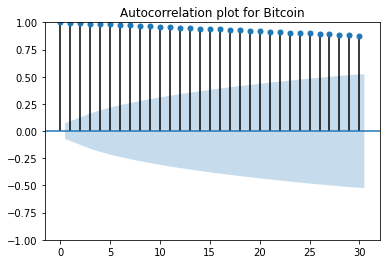

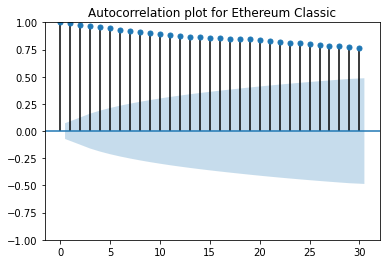

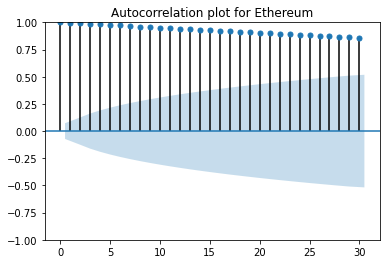

In [16]:
fig = plt.figure(figsize= (10,6))

sm.graphics.tsa.plot_acf(data['BTC'],lags=30, title='Autocorrelation plot for Bitcoin')
sm.graphics.tsa.plot_acf(data['ETC'],lags=30, title='Autocorrelation plot for Ethereum Classic')
sm.graphics.tsa.plot_acf(data['ETH'],lags=30, title='Autocorrelation plot for Ethereum')
plt.show()

There is gradual decay between the lags, which means the data is not stationary.

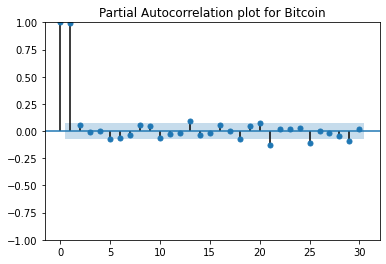

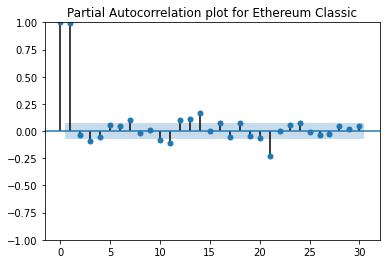

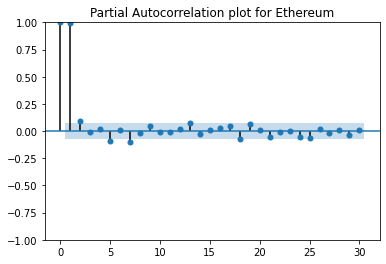

In [17]:
sm.graphics.tsa.plot_pacf(data['BTC'], lags=30, title='Partial Autocorrelation plot for Bitcoin')
sm.graphics.tsa.plot_pacf(data['ETC'], lags=30, title='Partial Autocorrelation plot for Ethereum Classic')
sm.graphics.tsa.plot_pacf(data['ETH'], lags=30, title='Partial Autocorrelation plot for Ethereum')
plt.show()

Partial auto correlation graph also confirms that the data is not stationary.

In [18]:
p_value_btc , p_value_etc, p_value_eth = adfuller(data['BTC'])[1], adfuller(data['ETC'])[1], adfuller(data['ETH'])[1]
print("The p-value of ADF test for BTC {}".format(p_value_btc))
print("The p-value of ADF test for ETC {}".format(p_value_etc))
print("The p-value of ADF test for ETH {}".format(p_value_eth))

The p-value of ADF test for BTC 0.735415936156147
The p-value of ADF test for ETC 0.3851250104462015
The p-value of ADF test for ETH 0.9186063064975907


P values are very high, so we fail reject the Null hypothesis. That means that the data is not stationary.

Taking the difference to make it stationary. Stationary data can be approximated using ARIMA model.


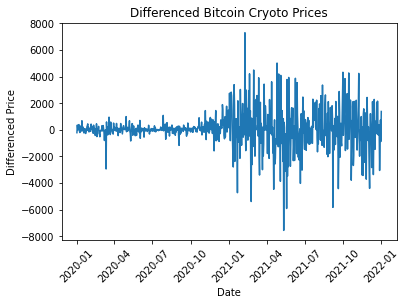

In [19]:
plt.plot(data['BTC'].diff())
plt.title('Differenced Bitcoin Cryoto Prices')
plt.ylabel('Differenced Price')
plt.xlabel('Date')
plt.xticks(rotation = 45)
plt.show()

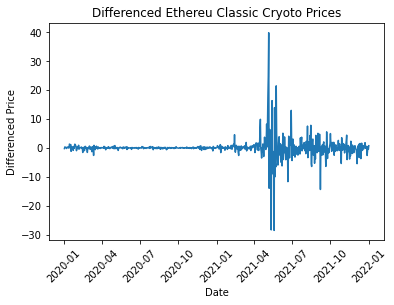

In [20]:
plt.plot(data['ETC'].diff())
plt.title('Differenced Ethereu Classic Cryoto Prices')
plt.ylabel('Differenced Price')
plt.xlabel('Date')
plt.xticks(rotation = 45)
plt.show()

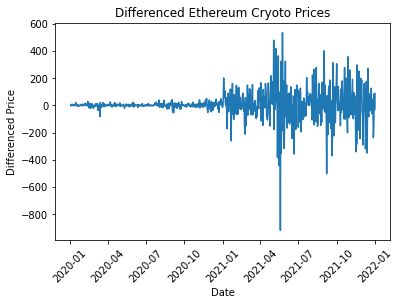

In [21]:
plt.plot(data['ETH'].diff())
plt.title('Differenced Ethereum Cryoto Prices')
plt.ylabel('Differenced Price')
plt.xlabel('Date')
plt.xticks(rotation = 45)
plt.show()

The differenced prices look stationary from the line plots. We can also see that there ig high fluctucation in the crypto prices starting towards the end of 2020 and cotinuing till now.

Creating dataframe with differences stock prices

In [22]:
diff_data = data.diff().dropna()
diff_data.head()

,BTC,ETC,ETH
Date,,,
2020-01-02,-214.704102,-0.246904,-3.391823
2020-01-03,359.414062,0.320349,6.761528
2020-01-04,65.772461,0.150605,0.897659
2020-01-05,0.660645,0.181057,1.207413
2020-01-06,357.901855,0.138220,8.027374


Checking stationarity using partial auto correlation plot.

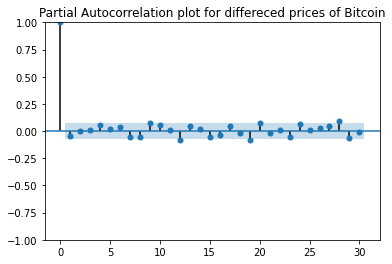

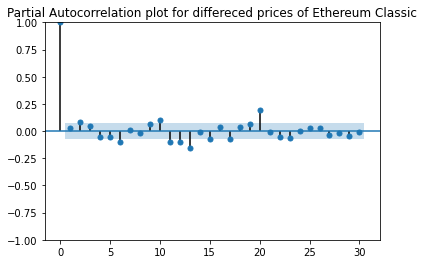

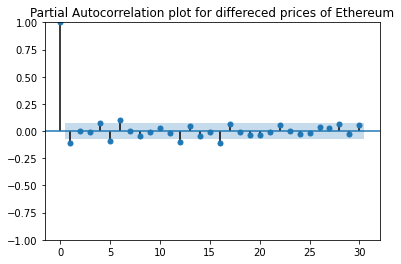

In [23]:
sm.graphics.tsa.plot_pacf(diff_data['BTC'], lags=30, title='Partial Autocorrelation plot for differeced prices of Bitcoin')
sm.graphics.tsa.plot_pacf(diff_data['ETC'], lags=30, title='Partial Autocorrelation plot for differeced prices of Ethereum Classic')
sm.graphics.tsa.plot_pacf(diff_data['ETH'], lags=30, title='Partial Autocorrelation plot for differeced prices of Ethereum')
plt.show()

There is sudden decay in the lags. Which indicates taht the data is stationary. We can confirm the stationarity using augmented Dickey–Fuller test below.

In [24]:
p_value_btc , p_value_etc, p_value_eth = adfuller(diff_data['BTC'])[1], adfuller(diff_data['ETC'])[1], adfuller(diff_data['ETH'])[1]
print("The p-value of ADF test for BTC {}".format(p_value_btc))
print("The p-value of ADF test for ETC {}".format(p_value_etc))
print("The p-value of ADF test for ETH {}".format(p_value_eth))

The p-value of ADF test for BTC 0.0
The p-value of ADF test for ETC 1.2897058641334104e-06
The p-value of ADF test for ETH 2.766508463064314e-10


ADF test confirms the stationarity of the data. The p-values are very low, so we reject the NULL hypothesis, and confirm that the data is stationary.

In [68]:
def plot_decomposition(data_crympto):
    from statsmodels.tsa.seasonal import STL
    decomposition = STL(data_crympto, seasonal = 91)

    res = decomposition.fit()
    fig = res.plot()

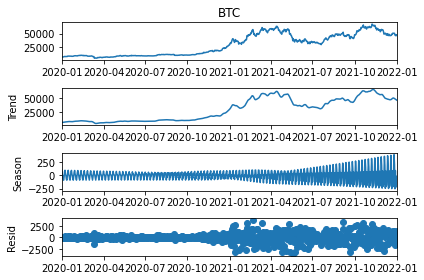

In [69]:
plot_decomposition(data['BTC'])

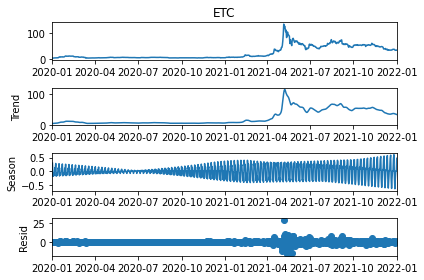

In [70]:
plot_decomposition(data['ETC'])

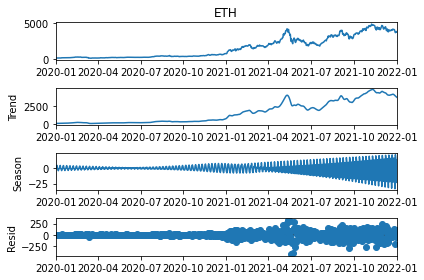

In [71]:
plot_decomposition(data['ETH'])

There is no seasonal behaviour in the crypto prices as observed from the decomposition plot.

In [27]:
size = int(len(data)*0.8)
df_train, df_test = data.iloc[:size], data.iloc[size:]

In [28]:
df_test

,BTC,ETC,ETH
Date,,,
2021-08-08,43798.117188,57.159027,3013.732666
2021-08-09,46365.402344,59.156113,3167.856201
2021-08-10,45585.031250,58.870560,3141.691162
2021-08-11,45593.636719,60.896935,3164.245117
2021-08-12,44428.289062,59.978035,3043.414307
...,...,...,...
2021-12-28,47588.855469,35.015480,3800.893066
2021-12-29,46444.710938,34.123405,3628.531738
2021-12-30,47178.125000,34.618679,3713.852051


In [29]:
from statsmodels.tsa.arima.model import ARIMA
import itertools

def determinePDQ(data_df):
    p=q=range(0,6)
    d=range(0,3)
    pdq=list(itertools.product(p,d,q))
    arima_results_blk=[]
    for param_set in pdq:
        try:
            arima_blk=ARIMA(data_df, order=param_set)
            arima_fitted_blk = arima_blk.fit()
            arima_results_blk.append(arima_fitted_blk.aic)
            print('=='*25)
            print('ARIMA parameters are:{} & AIC value is:{}'.format(param_set,  arima_fitted_blk.aic))
        except:
            continue
    print('**'*25)
    print('The Lowest AIC score is {:.4f} and the corresponding parameters are {}'.format(pd.DataFrame(arima_results_blk).where(pd.DataFrame(arima_results_blk).T.notnull().all()).min()[0],pdq[arima_results_blk.index(min(arima_results_blk))]))

In [30]:
determinePDQ(df_train['BTC'])

ARIMA parameters are:(0, 0, 0) & AIC value is:16234.578809925217
ARIMA parameters are:(0, 0, 1) & AIC value is:12351.389472773124
ARIMA parameters are:(0, 0, 2) & AIC value is:11984.742985357792
ARIMA parameters are:(0, 0, 3) & AIC value is:11576.498797936092
ARIMA parameters are:(0, 0, 4) & AIC value is:11149.90932259601
ARIMA parameters are:(0, 0, 5) & AIC value is:11375.516913626194
ARIMA parameters are:(0, 1, 0) & AIC value is:9998.506665074485
ARIMA parameters are:(0, 1, 1) & AIC value is:9998.071911133884
ARIMA parameters are:(0, 1, 2) & AIC value is:9994.378448081045
ARIMA parameters are:(0, 1, 3) & AIC value is:9995.414707791657
ARIMA parameters are:(0, 1, 4) & AIC value is:9996.695363888128
ARIMA parameters are:(0, 1, 5) & AIC value is:9998.72528819293
ARIMA parameters are:(0, 2, 0) & AIC value is:10425.112511640627
ARIMA parameters are:(0, 2, 1) & AIC value is:9993.076879953613
ARIMA parameters are:(0, 2, 2) & AIC value is:9993.183370102815
ARIMA parameters are:(0, 2, 3) & AI

In [31]:
model_arima_btc = ARIMA(df_train['BTC'], order=(4,2,3))
results_arima_btc = model_arima_btc.fit()
results_arima_btc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    BTC   No. Observations:                  585
Model:                 ARIMA(4, 2, 3)   Log Likelihood               -4978.795
Date:                Sat, 26 Mar 2022   AIC                           9973.590
Time:                        22:26:12   BIC                          10008.535
Sample:                    01-01-2020   HQIC                          9987.211
                         - 08-07-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5007      0.037    -13.602      0.000      -0.573      -0.429
ar.L2         -0.8775      0.039    -22.332      0.000      -0.954      -0.800
ar.L3          0.0564      0.039      1.457      0.145      -0.019       0.132
ar.L4          0.0881      0.033      2.661      0.008       0.023       0.153
ma.L1         -0.5468      0.017    -31.590      0.000      -0.581      -0.513
ma.L2          0.5170      0.020     25.343      0.000       0.477       0.557
ma.L3         -0.9662      0.021    -46.734      0.000      -1.007      -0.926
sigma2      1.691e+06   6.01e+04     28.149      0.000    1.57e+06    1.81e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               893.96
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):              22.20   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
y_pred_btc_arima = pd.Series(results_arima_btc.forecast(len(df_test))[0],index=df_test.index)

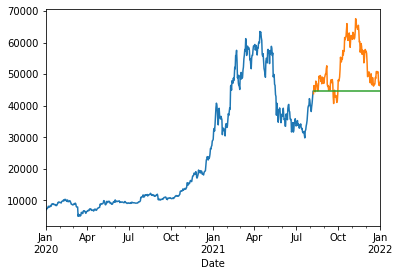

In [33]:
df_test['BTC_PRED'] = y_pred_btc_arima.values
df_train['BTC'].plot()
df_test['BTC'].plot()
df_test['BTC_PRED'].plot()

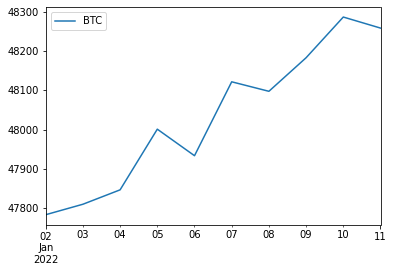

In [34]:
model_arima_btc = ARIMA(data['BTC'], order=(4,2,3))
results_arima_btc = model_arima_btc.fit()
forecast = results_arima_btc.forecast(steps=10)
df_forecast = pd.DataFrame(forecast)
df_forecast.columns = ['BTC']
df_forecast.plot()

In [35]:
determinePDQ(df_train['ETH'])

ARIMA parameters are:(0, 0, 0) & AIC value is:9700.139650594741
ARIMA parameters are:(0, 0, 1) & AIC value is:8997.4995160855
ARIMA parameters are:(0, 0, 2) & AIC value is:8805.64367284116
ARIMA parameters are:(0, 0, 3) & AIC value is:8137.054798245779
ARIMA parameters are:(0, 0, 4) & AIC value is:8543.815682747487
ARIMA parameters are:(0, 0, 5) & AIC value is:8093.826120515673
ARIMA parameters are:(0, 1, 0) & AIC value is:6920.256918273949
ARIMA parameters are:(0, 1, 1) & AIC value is:6910.995658704478
ARIMA parameters are:(0, 1, 2) & AIC value is:6897.451017803014
ARIMA parameters are:(0, 1, 3) & AIC value is:6899.163398468629
ARIMA parameters are:(0, 1, 4) & AIC value is:6900.962187954159
ARIMA parameters are:(0, 1, 5) & AIC value is:6900.923122220347
ARIMA parameters are:(0, 2, 0) & AIC value is:7394.5158910628425
ARIMA parameters are:(0, 2, 1) & AIC value is:6915.86810575898
ARIMA parameters are:(0, 2, 2) & AIC value is:6906.283272024949
ARIMA parameters are:(0, 2, 3) & AIC value 

In [36]:
model_arima_eth = ARIMA(df_train['ETH'], order=(3,2,5))
results_arima_eth = model_arima_eth.fit()
results_arima_eth.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    ETH   No. Observations:                  585
Model:                 ARIMA(3, 2, 5)   Log Likelihood               -3415.246
Date:                Sat, 26 Mar 2022   AIC                           6848.492
Time:                        22:28:23   BIC                           6887.806
Sample:                    01-01-2020   HQIC                          6863.816
                         - 08-07-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2642      0.045    -28.397      0.000      -1.351      -1.177
ar.L2         -1.2304      0.051    -24.044      0.000      -1.331      -1.130
ar.L3         -0.6580      0.043    -15.283      0.000      -0.742      -0.574
ma.L1          0.1550      0.057      2.740      0.006       0.044       0.266
ma.L2          0.1683      0.042      3.978      0.000       0.085       0.251
ma.L3         -0.5066      0.048    -10.547      0.000      -0.601      -0.412
ma.L4         -0.6103      0.052    -11.716      0.000      -0.712      -0.508
ma.L5         -0.1933      0.028     -6.830      0.000      -0.249      -0.138
sigma2      7899.0684    205.195     38.495      0.000    7496.894    8301.242
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              8038.24
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):             150.93   Skew:                            -1.03
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

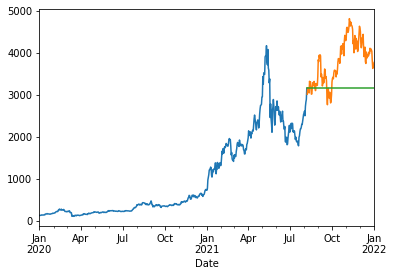

In [37]:
y_pred_eth_arima = pd.Series(results_arima_eth.forecast(len(df_test))[0],index=df_test.index)
df_test['ETH_PRED'] = y_pred_eth_arima.values
df_train['ETH'].plot()
df_test['ETH'].plot()
df_test['ETH_PRED'].plot()

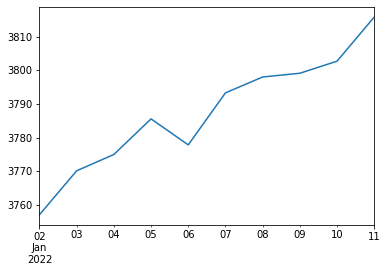

In [38]:
model_arima_eth = ARIMA(data['ETH'], order=(3,2,5))
results_arima_eth = model_arima_eth.fit()
forecast = results_arima_eth.forecast(steps=10)
df_forecast['ETH'] = pd.DataFrame(forecast)
df_forecast['ETH'].plot()

In [39]:
determinePDQ(df_train['ETC'])

ARIMA parameters are:(0, 0, 0) & AIC value is:5281.553405438421
ARIMA parameters are:(0, 0, 1) & AIC value is:4605.265078236978
ARIMA parameters are:(0, 0, 2) & AIC value is:4160.420404319133
ARIMA parameters are:(0, 0, 3) & AIC value is:3880.3877240027887
ARIMA parameters are:(0, 0, 4) & AIC value is:3687.921664420339
ARIMA parameters are:(0, 0, 5) & AIC value is:3566.2597710206064
ARIMA parameters are:(0, 1, 0) & AIC value is:3119.781148378136
ARIMA parameters are:(0, 1, 1) & AIC value is:3121.210687710065
ARIMA parameters are:(0, 1, 2) & AIC value is:3114.935228932315
ARIMA parameters are:(0, 1, 3) & AIC value is:3112.3692669052534
ARIMA parameters are:(0, 1, 4) & AIC value is:3113.9843628231515
ARIMA parameters are:(0, 1, 5) & AIC value is:3115.679621832945
ARIMA parameters are:(0, 2, 0) & AIC value is:3496.6565960822745
ARIMA parameters are:(0, 2, 1) & AIC value is:3123.407970504398
ARIMA parameters are:(0, 2, 2) & AIC value is:3124.772196377094
ARIMA parameters are:(0, 2, 3) & AI

In [40]:
model_arima_etc = ARIMA(df_train['ETC'], order=(5,1,5))
results_arima_etc = model_arima_etc.fit()
results_arima_etc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    ETC   No. Observations:                  585
Model:                 ARIMA(5, 1, 5)   Log Likelihood               -1530.747
Date:                Sat, 26 Mar 2022   AIC                           3083.494
Time:                        22:30:09   BIC                           3131.563
Sample:                    01-01-2020   HQIC                          3102.229
                         - 08-07-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5884      0.115     -5.105      0.000      -0.814      -0.363
ar.L2         -0.2478      0.120     -2.068      0.039      -0.483      -0.013
ar.L3         -0.6209      0.067     -9.282      0.000      -0.752      -0.490
ar.L4         -0.3827      0.092     -4.169      0.000      -0.563      -0.203
ar.L5          0.2954      0.091      3.244      0.001       0.117       0.474
ma.L1          0.6010      0.124      4.846      0.000       0.358       0.844
ma.L2          0.3878      0.117      3.329      0.001       0.159       0.616
ma.L3          0.8605      0.073     11.843      0.000       0.718       1.003
ma.L4          0.5780      0.122      4.754      0.000       0.340       0.816
ma.L5         -0.1360      0.115     -1.186      0.235      -0.361       0.089
sigma2        11.0475      0.262     42.116      0.000      10.533      11.562
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):             40562.76
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):              98.04   Skew:                             1.68
Prob(H) (two-sided):                  0.00   Kurtosis:                        43.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

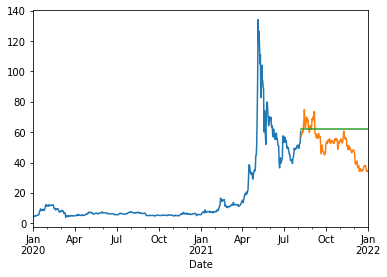

In [41]:
y_pred_etc_arima = pd.Series(results_arima_etc.forecast(len(df_test))[0],index=df_test.index)
df_test['ETC_PRED'] = y_pred_etc_arima.values
df_train['ETC'].plot()
df_test['ETC'].plot()
df_test['ETC_PRED'].plot()

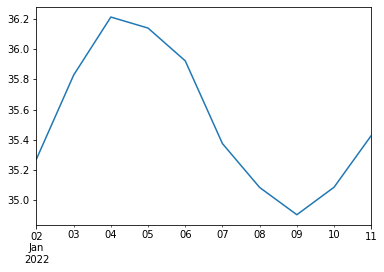

In [42]:
model_arima_etc = ARIMA(data['ETC'], order=(5,1,5))
results_arima_etc = model_arima_etc.fit()
forecast = results_arima_etc.forecast(steps=10)
df_forecast['ETC'] = pd.DataFrame(forecast)
df_forecast['ETC'].plot()

In [43]:
from pmdarima.arima import auto_arima
model_sarima_btc = auto_arima(df_train['BTC'],d=1,D=1,m=1,error_action='ignore',suppress_warnings=True,
                                 stepwise=True,seasonal=True,n_jobs=-1,random_state=20,random=True)
model_sarima_btc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  585
Model:               SARIMAX(0, 1, 2)   Log Likelihood               -4994.189
Date:                Sat, 26 Mar 2022   AIC                           9994.378
Time:                        22:30:15   BIC                          10007.488
Sample:                             0   HQIC                          9999.488
                                - 585                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0721      0.032     -2.279      0.023      -0.134      -0.010
ma.L2          0.0967      0.029      3.352      0.001       0.040       0.153
sigma2       1.59e+06   4.59e+04     34.619      0.000     1.5e+06    1.68e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1227.22
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              34.09   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

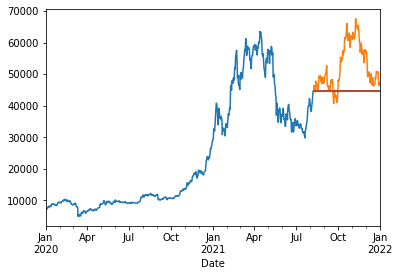

In [44]:
y_pred_btc_sarima = pd.Series(model_sarima_btc.predict(n_periods=len(df_test))[0],index=df_test.index)
df_test['BTC_PRED_SARIMA'] = y_pred_btc_sarima.values
df_train['BTC'].plot()
df_test['BTC'].plot()
df_test['BTC_PRED'].plot()
df_test['BTC_PRED_SARIMA'].plot()

In [45]:
model_sarima_eth = auto_arima(df_train['ETH'],d=None,D=1,m=1,error_action='ignore',suppress_warnings=True,
                                 stepwise=True,seasonal=True,n_jobs=-1,random_state=20,random=True)
model_sarima_eth.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  585
Model:               SARIMAX(0, 1, 2)   Log Likelihood               -3445.726
Date:                Sat, 26 Mar 2022   AIC                           6897.451
Time:                        22:30:20   BIC                           6910.561
Sample:                             0   HQIC                          6902.561
                                - 585                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1499      0.022     -6.723      0.000      -0.194      -0.106
ma.L2          0.1691      0.020      8.479      0.000       0.130       0.208
sigma2      7804.2100    149.345     52.256      0.000    7511.499    8096.921
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             11964.68
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):             196.53   Skew:                            -1.07
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

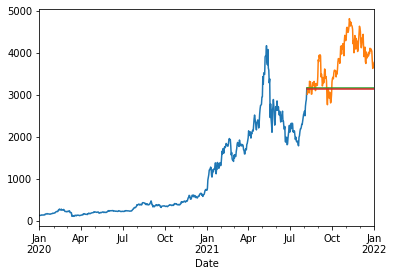

In [46]:
y_pred_eth_sarima = pd.Series(model_sarima_eth.predict(n_periods=len(df_test))[0],index=df_test.index)
df_test['ETH_PRED_SARIMA'] = y_pred_eth_sarima.values
df_train['ETH'].plot()
df_test['ETH'].plot()
df_test['ETH_PRED'].plot()
df_test['ETH_PRED_SARIMA'].plot()

In [47]:
model_sarima_etc = auto_arima(df_train['ETC'],d=None,D=1,m=1,error_action='ignore',suppress_warnings=True,
                                 stepwise=True,seasonal=True,n_jobs=-1,random_state=20,random=True)
model_sarima_etc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  585
Model:               SARIMAX(3, 1, 2)   Log Likelihood               -1540.005
Date:                Sat, 26 Mar 2022   AIC                           3092.011
Time:                        22:30:41   BIC                           3118.230
Sample:                             0   HQIC                          3102.230
                                - 585                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3120      0.027     47.781      0.000       1.258       1.366
ar.L2         -0.7328      0.039    -19.008      0.000      -0.808      -0.657
ar.L3         -0.0984      0.018     -5.431      0.000      -0.134      -0.063
ma.L1         -1.3182      0.025    -53.484      0.000      -1.367      -1.270
ma.L2          0.8679      0.022     38.986      0.000       0.824       0.912
sigma2        11.4189      0.164     69.420      0.000      11.096      11.741
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             49043.52
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):             158.75   Skew:                             2.51
Prob(H) (two-sided):                  0.00   Kurtosis:                        47.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

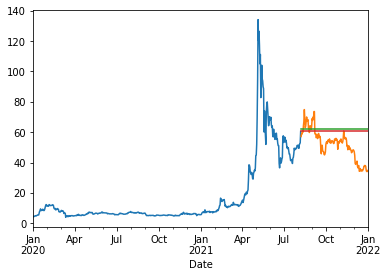

In [48]:
y_pred_etc_sarima = pd.Series(model_sarima_etc.predict(n_periods=len(df_test))[0],index=df_test.index)
df_test['ETC_PRED_SARIMA'] = y_pred_etc_sarima.values
df_train['ETC'].plot()
df_test['ETC'].plot()
df_test['ETC_PRED'].plot()
df_test['ETC_PRED_SARIMA'].plot()